In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd "/content/drive/MyDrive/ML and DM /prj/pro house price predict"

/content/drive/MyDrive/ML and DM /prj/pro house price predict


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import os
import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

***Load the Data***

Let's import the 'kc_house_data.csv' file . I will name the variable as dataset.


In [ ]:
dataset = pd.read_csv("kc_house_data.csv")
# đọc dữ liệu từ dataset dataset

> ***First 20 rows of data.***

Since we have loaded the data, now we will read our data. The below will give us the 20 record of our dataset.

In [ ]:
dataset.head(20)
# 20 bản ghi đầu trong

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


***Dataset contains:*****


**Id:** a notation for a house

**Date:** Date house was sold

**Price:** Price is prediction target

**Bedrooms:** Number of Bedrooms/House

**Bathrooms:** Number of bathrooms/House

**Sqft_Living:**  square footage of the home

***Sqft_Lot:*** square footage of the lot

***Floors:*** Total floors (levels) in house

***Waterfront:*** House which has a view to a waterfront

***View:*** Has been viewed

***Condition:*** How good the condition is ( Overall )

***Grade:*** overall grade given to the housing unit, based on King County grading system

***Sqft_Above:*** square footage of house apart from basement

***Sqft_Basement:*** square footage of the basement

***Yr_Built:*** Built Year

***Yr_Renovated:*** Year when house was renovated

***Zipcode:*** Zip

***Lat:*** Latitude coordinate

***Long:*** Longitude coordinate

***Sqft_Living15:*** Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

***Sqft_Lot15:***  lotSize area in 2015(implies-- some renovations)


***Null Value Detection***
Let's Check for null values in the dataset


In [ ]:
#Check whether there is any null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
dataset.isna().sum()
# tổng hợp dữ liệu thiếu trong dataset

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

***Finding Unique Values:***

From the above it is clear that the dataset have no null values present, so lets check how many unique values is present for each feature. We will loop through the dataset for checking the unique values present.

In [ ]:
#Lets find out how many unique values are present in each column

for value in dataset:
    print('For {},{} unique values present'.format(value,dataset[value].nunique()))

For id,21436 unique values present
For date,372 unique values present
For price,4028 unique values present
For bedrooms,13 unique values present
For bathrooms,30 unique values present
For sqft_living,1038 unique values present
For sqft_lot,9782 unique values present
For floors,6 unique values present
For waterfront,2 unique values present
For view,5 unique values present
For condition,5 unique values present
For grade,12 unique values present
For sqft_above,946 unique values present
For sqft_basement,306 unique values present
For yr_built,116 unique values present
For yr_renovated,70 unique values present
For zipcode,70 unique values present
For lat,5034 unique values present
For long,752 unique values present
For sqft_living15,777 unique values present
For sqft_lot15,8689 unique values present


***Dropping of the particular column value:***

We don't require the column id and date at this point so we will be dropping them from the dataset.  

In [ ]:
dataset = dataset.drop(['id','date'],axis=1)

***View the modified dataset***

Let's now again view the dataset using the same head command we used earlier.

In [ ]:
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


***Data Visulaization using seaborn***

So all the column data remains the same except the two column is dropped. Let's now forward with data visualization using a pairplot


<Figure size 1000x600 with 0 Axes>

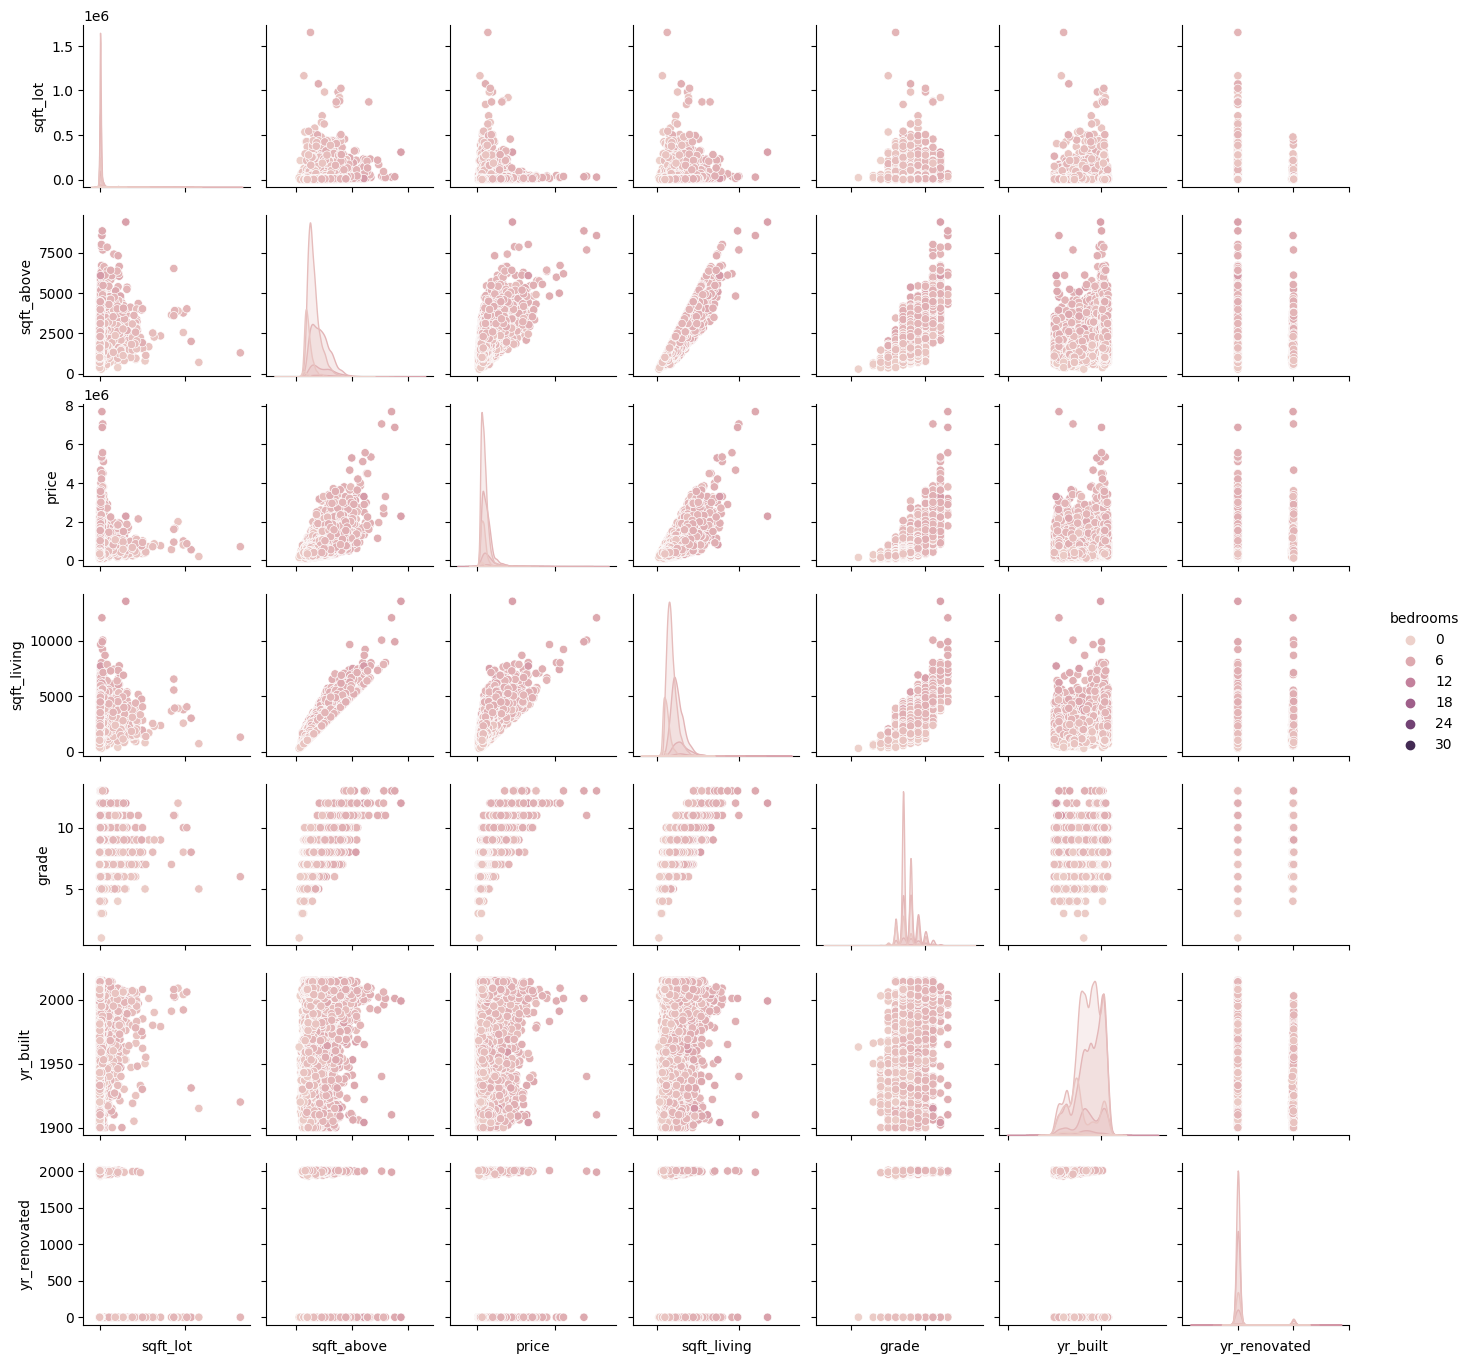

In [ ]:
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',size=2)
g.set(xticklabels=[])

# dùng thư viện seaborn hàm pairplot

From the above plot it is clear for a linear regression for sqft_living & price,

So lets plot them in a joint plot to explore more on the data.

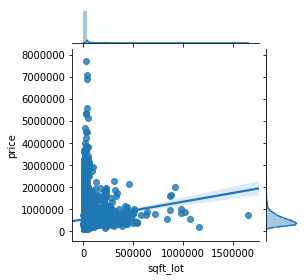

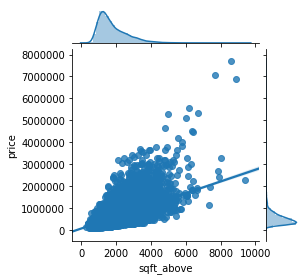

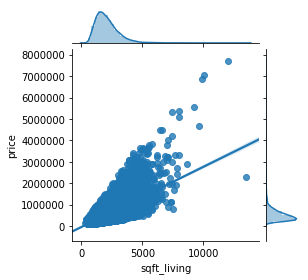

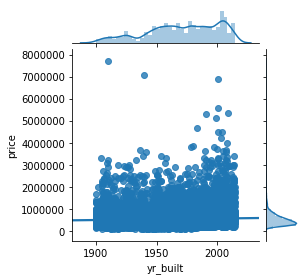

In [ ]:

sns.jointplot(x='sqft_lot',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='sqft_above',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='sqft_living',y='price',data=dataset,kind='reg',size=4)
sns.jointplot(x='yr_built',y='price',data=dataset,kind='reg',size=4)


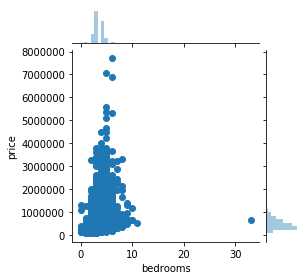

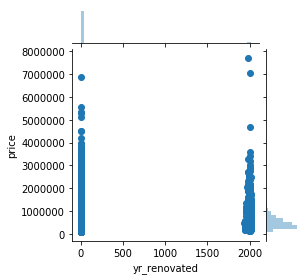

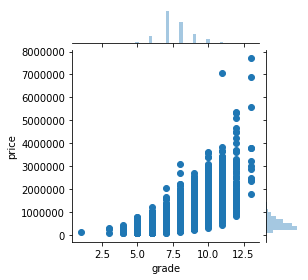

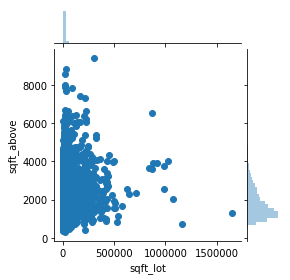

In [ ]:
sns.jointplot(x='bedrooms',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='yr_renovated',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='grade',y='price',data=dataset,kind='scatter',size=4)
sns.jointplot(x='sqft_lot',y='sqft_above',data=dataset,kind='scatter',size=4)

***Co relation between Variables***

We wil use heatmap to view the co relation between variables



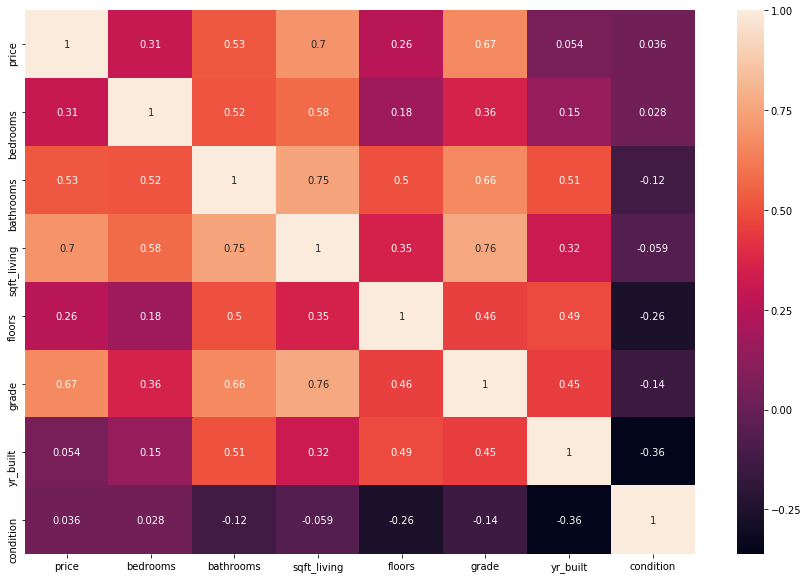

In [ ]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(dataset[columns].corr(),annot=True)

***Model on the train data***

We will start building our model using different regression models



In [ ]:
# X(Independent variables) and y(target variables)
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [ ]:
#Splitting the data into train,test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Calculate accuracy**

In [ ]:
def calculate_mae(y_true, y_pred):
    n = len(y_true)
    total_error = 0
    for i in range(n):
        total_error += abs(y_true[i] - y_pred[i])
    mae = total_error / n
    return mae
# MAE: bằng trung bình cộng sai số của dự đoán và dữ liệu thực tế

def calculate_mse(y_true, y_pred):
    n = len(y_true)
    total_error = 0
    for i in range(n):
        total_error += (y_true[i] - y_pred[i]) ** 2
    mse = total_error / n
    return mse
# MSE: bình phương của tổng các sai số của dự đoán và dữ liệu thực tế
# MSE nhạy hơn với các dữ liệu outlier tức là các sai số cực lớn, vì có bình phương, MAE thì không

def calculate_r2(y_true, y_pred):
    n = len(y_true)
    mean_y_true = sum(y_true) / n
    ss_total = sum((y_true[i] - mean_y_true) ** 2 for i in range(n))
    ss_residual = sum((y_true[i] - y_pred[i]) ** 2 for i in range(n))
    r2 = 1 - (ss_residual / ss_total)
    return r2
# R^2 = 1 - (SSR / SST) tỉ lệ của sự biến thiên được giải thích bởi mô hình (SSR) so với tổng biến thiên tổng thể (SST)
# SSR = Σ(y_pred - y_true)² tổng bình phương sai số giữa dự đoán và thực tế
# SST = Σ(y_true - y_mean)² tổng bình phương của sự sai biệt giữa giá trị thực tế và giá trị trung bình của dữ liệu
# SSR là giá trị theo dự đoán của mô hình, các mô hình khác nhau thì dự đoán khác nhau => nó thay đổi theo mô hình, SST là giá trị không thay đổi
# SSR càng nhỏ hơn SST, tức là sự biến thiên do mô hình không giải thích được (sai số) càng nhỏ hơn tổng sự biến thiên tổng thể
# => mô hình có khả năng giải thích một phần lớn sự biến thiên của dữ liệu và gần giống với dữ liệu thực tế hơn => mô hình tốt




```
# This is formatted as code
```

##  **Ridge Regression:**

Fitting the train set to ridge regression and getting the score of the model

In [ ]:
import numpy as np

class Ridge_Regression:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.theta = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        # Calculate the parameters (theta) using the ridge regression formula
        X_transpose_X = X.T.dot(X)
        I = np.eye(X.shape[1])
        self.theta = np.linalg.inv(X_transpose_X + self.alpha * I).dot(X.T).dot(y)

    def predict(self, X):
        # Add a column of ones to X for the intercept term
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

        # Predict new values
        y_pred = X.dot(self.theta)

        return y_pred


In [ ]:
# Create a linear regression object
model = Ridge_Regression(alpha=0.5)

# Fit the model to the data
model.fit(X_train, y_train)

# Print the calculated parameters
print("Theta:", model.theta)

# Predict new values
y_pred = model.predict(X_test)

# Print the predicted values
print("Predicted values:", y_pred)
print(y_test)


In [ ]:
print("MAE: ", calculate_mae(y_test, y_pred))
print("MSE: ", calculate_mse(y_test, y_pred))
print("RMSE: ", np.sqrt(calculate_mse(y_test, y_pred)))
print("R^2 score: ", calculate_r2(y_test, y_pred))

MAE:  127445.3231526795
MSE:  45188882672.41349
RMSE:  212576.76889164886
R^2 score:  0.7010856897348363


In [ ]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.5)
model.fit(X_train, y_train)
# Predict new values
y_pred = model.predict(X_test)

# Print the predicted values
print("Predicted values:", y_pred)
print(y_test)

Predicted values: [ 461312.55140111  752276.85509103 1238660.73239604 ...  423207.70786798
  617673.23887891  442446.11523236]
[ 365000.  865000. 1038000. ...  285000.  605000.  356500.]


In [ ]:
print("MAE: ", calculate_mae(y_test, y_pred))
print("MSE: ", calculate_mse(y_test, y_pred))
print("RMSE: ", np.sqrt(calculate_mse(y_test, y_pred)))
print("R^2 score: ", calculate_r2(y_test, y_pred))

MAE:  127490.4107983923
MSE:  45178996874.095375
RMSE:  212553.515318132
R^2 score:  0.7011510820705376


##**Random Forest Regression Model**




In [ ]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.value = None

    def fit(self, X, y):
        # print("dct max depth: ", self.max_depth)
        if self.max_depth is not None or self.max_depth > 0:
            # feature_count = X.shape[1]
            feature_sample = np.random.choice(X.shape[1], int(np.sqrt(X.shape[1])), replace=False)
            # feature_count = feature_sample[1]
            min_mse = float('inf')

            for feature_i in feature_sample:
                thresholds = np.unique(X[:, feature_i])
                for thresh in thresholds:
                    left_indices = X[:, feature_i] <= thresh
                    right_indices = X[:, feature_i] > thresh

                    if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                        continue

                    left_y = y[left_indices]
                    right_y = y[right_indices]
                    mse = self.calculate_mse(left_y, right_y)

                    if mse < min_mse:
                        min_mse = mse
                        self.feature_index = feature_i
                        self.threshold = thresh

            if self.feature_index is not None:
                left_indices = X[:, self.feature_index] <= self.threshold
                right_indices = X[:, self.feature_index] > self.threshold

                self.left = DecisionTreeRegressor(max_depth=self.max_depth - 1)
                self.left.fit(X[left_indices], y[left_indices])

                self.right = DecisionTreeRegressor(max_depth=self.max_depth - 1)
                self.right.fit(X[right_indices], y[right_indices])

            else:
                self.value = np.mean(y)

    def calculate_mse(self, left_y, right_y):
        left_mse = np.mean((left_y - np.mean(left_y))**2)
        right_mse = np.mean((right_y - np.mean(right_y))**2)
        return (len(left_y) * left_mse + len(right_y) * right_mse) / (len(left_y) + len(right_y))

    def predict(self, X):
        if self.value is not None:
            return np.full(X.shape[0], self.value)

        predictions = np.zeros(X.shape[0])
        # print("dct predict: ", self.threshold)
        left_indices = X[:, self.feature_index] <= self.threshold
        right_indices = X[:, self.feature_index] > self.threshold

        if self.left is not None:
            predictions[left_indices] = self.left.predict(X[left_indices])

        if self.right is not None:
            predictions[right_indices] = self.right.predict(X[right_indices])

        return predictions

class RandomForestRegressor:
    def __init__(self, num_trees=100, max_depth=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.num_trees):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            indices = np.random.choice(X.shape[0], X.shape[0], replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)
            # print("\n rf train\n")

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for tree in self.trees:
            predictions += tree.predict(X)
            # print("yes")
        return predictions / self.num_trees


In [ ]:
# Create and train the random forest regressor
rf_regressor = RandomForestRegressor(num_trees=50, max_depth=10)
rf_regressor.fit(X_train, y_train)

# Make predictions on test data
predictions = rf_regressor.predict(X_test)
print(predictions)

In [ ]:
print("MAE: ", calculate_mae(y_test, predictions))
print("MSE: ", calculate_mse(y_test, predictions))
print("RMSE: ", np.sqrt(calculate_mse(y_test, predictions)))
print("R^2 score: ", calculate_r2(y_test, predictions))

MAE:  77451.88726396763
MSE:  23518642636.714176
RMSE:  153357.89068943984
R^2 score:  0.8444294608236035


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=50,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)



In [ ]:
print("MAE: ", calculate_mae(y_test, rf_pred))
print("MSE: ", calculate_mse(y_test, rf_pred))
print("RMSE: ", np.sqrt(calculate_mse(y_test, rf_pred)))
print("R^2 score: ", calculate_r2(y_test, rf_pred))

MAE:  73160.61818076085
MSE:  22716249255.44779
RMSE:  150719.10713458923
R^2 score:  0.8497371128375134


### Conclusion

From the above it is clear that random forest regression with library accuracy is **84%** and also expalined variance score is **0.84**  . So Random Forest is a suitable model for predicting the price of the house.

Though there remains other regression model which can bring out the best of the dataset.

Please upvote if you like my work, this motivates  me to work better :)


